Sebastian Raschka, 2015  
`mlxtend`, a library of extension and helper modules for Python's data analysis and machine learning libraries

- GitHub repository: https://github.com/rasbt/mlxtend
- Documentation: http://rasbt.github.io/mlxtend/

View this page in [jupyter nbviewer](http://nbviewer.ipython.org/github/rasbt/mlxtend/blob/master/docs/sources/_ipynb_templates/regressor/linear_regression.ipynb)

In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -u -d -v -p matplotlib,numpy,scipy,mlxtend

Sebastian Raschka 
last updated: 2016-03-27 

CPython 3.5.1
IPython 4.0.3

matplotlib 1.5.1
numpy 1.10.4
scipy 0.17.0
mlxtend 0.3.1.dev0


In [1]:
%matplotlib inline

# TensorFlow Softmax Regression

A multinomial logistic (aka "softmax") regression class for multi-class classification tasks.

> from mlxtend.tf_classifier import TfSoftmaxRegression

# Overview

![](./TfSoftmaxRegression_files/softmax_schematic_1.png)

Please refer to the documentation of the equivalent NumPy implementation [`classifier.SoftmaxRegression`](../classifier/SoftmaxRegression.md) for details.

# Examples

## Example 1 - Gradient Descent

Simple gradient descent training via `minibatches=1`:

Epoch: 20/20 | Cost 0.37 | TrainAcc 0.93

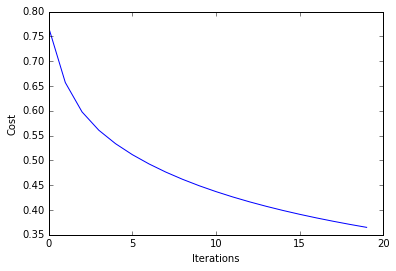

In [2]:
from mlxtend.tf_classifier import TfSoftmaxRegression
from mlxtend.data import iris_data
from mlxtend.evaluate import plot_decision_regions
import matplotlib.pyplot as plt

# Loading Data
X, y = iris_data()
X = X[:, [0, 3]] # sepal length and petal width

# standardize
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

lr = TfSoftmaxRegression(eta=0.75, 
                         epochs=20, 
                         print_progress=True, 
                         minibatches=1, 
                         random_seed=1)

lr.fit(X, y)

plt.plot(range(len(lr.cost_)), lr.cost_)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

Continue the training if cost could be further decreased via additional epochs. Instead of training the classifier another 20 epochs, we modify the epochs and set them to 500. Also, we want to make sure to set `init_weights` to `False` in order to re-use the model parameters from the previous training.

Epoch: 500/500 | Cost 0.13 | TrainAcc 0.97

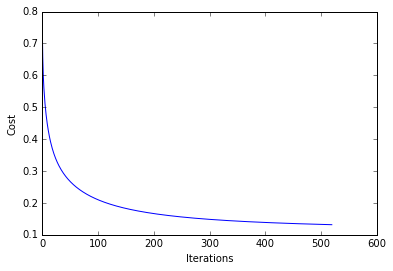

In [3]:
lr.epochs = 500
lr.fit(X, y, init_weights=False)
plt.plot(range(len(lr.cost_)), lr.cost_)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

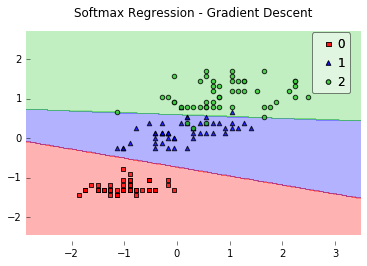

In [4]:
plot_decision_regions(X, y, clf=lr)
plt.title('Softmax Regression - Gradient Descent')
plt.show()

### Predicting Class Labels

In [5]:
print('Predicted class labels:', lr.predict(X[[0, 99, 149]]))

Predicted class labels: [0 1 2]


### Predicting Class Probabilities

In [6]:
print('Predicted class probabilities:\n', lr.predict_proba(X[[0, 99, 149]]))

Predicted class probabilities:
 [[  9.92753923e-01   7.24608125e-03   6.90939350e-09]
 [  5.35254460e-03   9.61461246e-01   3.31862010e-02]
 [  1.28487800e-05   2.01715842e-01   7.98271239e-01]]


## Example 2 - Stochastic Gradient Descent

Stochastic gradient descent training sample by sample can be achieved by setting the number of minibatches equal to the number of samples in the training dataset; everything between `minibatches=1` and `minibatches=len(y)` is "minibatch" stochastic gradient descent.

Epoch: 10/10 | Cost 0.15 | TrainAcc 0.96

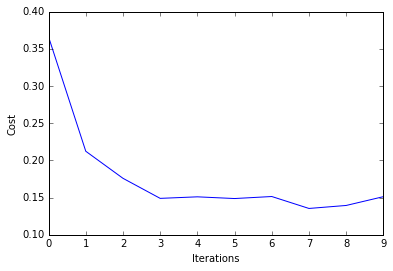

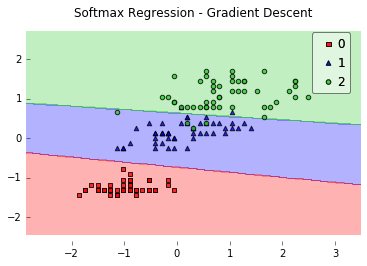

In [7]:
from mlxtend.data import iris_data
from mlxtend.evaluate import plot_decision_regions
from mlxtend.tf_classifier import TfSoftmaxRegression
import matplotlib.pyplot as plt

# Loading Data

X, y = iris_data()
X = X[:, [0, 3]] # sepal length and petal width

# standardize
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

lr = TfSoftmaxRegression(eta=0.5, 
                         epochs=10, 
                         minibatches=len(y), 
                         print_progress=True, 
                         random_seed=1)
lr.fit(X, y)

plt.plot(range(len(lr.cost_)), lr.cost_)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

plot_decision_regions(X, y, clf=lr)
plt.title('Softmax Regression - Gradient Descent')
plt.show()

## Example 3 - MNIST

Note that `mnist_data` just contains a random 5000-sample subset of MNIST (~10% of the original dataset size).

Epoch: 100/100 | Cost 4.76 | TrainAcc 0.98

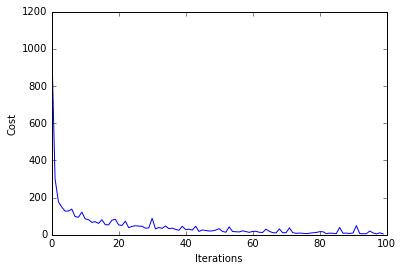

In [8]:
from mlxtend.data import mnist_data
from mlxtend.tf_classifier import TfSoftmaxRegression
import matplotlib.pyplot as plt

X, y = mnist_data()

lr = TfSoftmaxRegression(eta=0.01, 
                         epochs=100, 
                         minibatches=20, 
                         print_progress=True, 
                         random_seed=1)
lr.fit(X, y)

plt.plot(range(len(lr.cost_)), lr.cost_)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [9]:
import numpy as np
y_pred = lr.predict(X)
print('Training Accuracy: %.2f%%' % (lr.score(X, y) * 100))

Training Accuracy: 97.74%


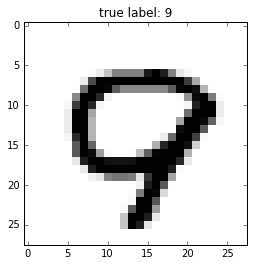

In [10]:
def plot_digit(X, y, idx):
    img = X[idx].reshape(28,28)
    plt.imshow(img, cmap='Greys',  interpolation='nearest')
    plt.title('true label: %d' % y[idx])
    plt.show()
plot_digit(X, y, 4999)  

In [11]:
print('Prediction: %d' % lr.predict(X[4999, None]))

Prediction: 9


## Example 4 -- Training and Validation Accuracies During Training

Training accuracies are collected for each epoch by default. Optionally, we can pass validation dataset during model fitting to compute the validation accuracy values for each epoch. Here, pass 4000 samples from MNIST for training and 1000 samples from MNIST for validation.

In [12]:
from mlxtend.data import mnist_data
from mlxtend.preprocessing import shuffle_arrays_unison
from mlxtend.tf_classifier import TfSoftmaxRegression
import matplotlib.pyplot as plt

X, y = mnist_data()
X, y = shuffle_arrays_unison((X, y), random_seed=1)

lr = TfSoftmaxRegression(eta=0.01, 
                         epochs=100, 
                         minibatches=20, 
                         print_progress=True, 
                         random_seed=1)
lr.fit(X=X[:4000], 
       y=y[:4000],
       X_valid=X[4000:],
       y_valid=y[4000:])

Epoch: 100/100 | Cost 0.59 | TrainAcc 0.99 | ValidAcc 0.85

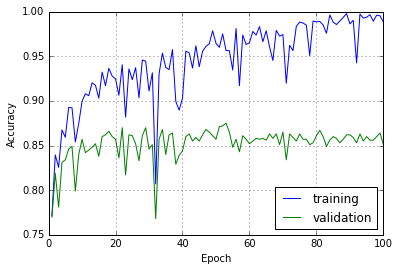

In [14]:
plt.plot(range(1, lr.epochs + 1), lr.train_acc_, label='training')
plt.plot(range(1, lr.epochs + 1), lr.valid_acc_, label='validation')
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# API

In [15]:
with open('../../api_modules/mlxtend.tf_classifier/TfSoftmaxRegression.md', 'r') as f:
    print(f.read())

## TfSoftmaxRegression

*TfSoftmaxRegression(eta=0.5, epochs=50, minibatches=1, random_seed=None, print_progress=0, dtype=None)*

Softmax regression classifier.

**Parameters**

- `eta` : float (default: 0.5)

    Learning rate (between 0.0 and 1.0)

- `epochs` : int (default: 50)

    Passes over the training dataset.

- `minibatches` : int (default: 1)

    Divide the training data into *k* minibatches
    for accelerated stochastic gradient descent learning.
    Gradient Descent Learning if `minibatches` = 1
    Stochastic Gradient Descent learning if `minibatches` = len(y)
    Minibatch learning if `minibatches` > 1

- `random_seed` : int (default: None)

    Set random state for shuffling and initializing the weights.

- `print_progress` : int (default: 0)

    Prints progress in fitting to stderr.
    0: No output
    1: Epochs elapsed and cost
    2: 1 plus time elapsed
    3: 2 plus estimated time until completion

- `dtype` : Array-type (default: None)

    Uses tensorflow.flo